## Домашнее задание <a class='anchor' id='hw'>

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [74]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [75]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [76]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [77]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [78]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-2, reg=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
# Закомментируем принты, чтобы в цикле не получить простыню промежуточных весов       
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'lambda: {reg} Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [79]:
# Создадим массив лямбда

n = 50
lambda_list = np.logspace(-10, -1, n)

# Пройдемся циклом вызывая gradient_descent_reg_l2 с разными lambda, сохраним веса в список

w_list = []

for i, val in enumerate(lambda_list):
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    w_list.append(W) 

lambda: 1e-10 Final MSE: 25.001116646353115
lambda: 1.5264179671752366e-10 Final MSE: 24.999230902895615
lambda: 2.329951810515372e-10 Final MSE: 24.998687287837495
lambda: 3.556480306223136e-10 Final MSE: 24.996949457418555
lambda: 5.428675439323859e-10 Final MSE: 25.003816385351676
lambda: 8.28642772854686e-10 Final MSE: 25.013850604812994
lambda: 1.2648552168552958e-09 Final MSE: 25.00813759248161
lambda: 1.9306977288832536e-09 Final MSE: 24.993981205781523
lambda: 2.94705170255181e-09 Final MSE: 24.998316785475016
lambda: 4.498432668969453e-09 Final MSE: 24.999442508821087
lambda: 6.866488450042998e-09 Final MSE: 24.994703870456615
lambda: 1.0481131341546874e-08 Final MSE: 24.992080331167333
lambda: 1.5998587196060573e-08 Final MSE: 24.997866660741913
lambda: 2.4420530945486548e-08 Final MSE: 24.97904098502708
lambda: 3.7275937203149377e-08 Final MSE: 25.000610526045083
lambda: 5.689866029018305e-08 Final MSE: 25.000080123069132
lambda: 8.68511373751352e-08 Final MSE: 24.9975372422

In [80]:
# w_list

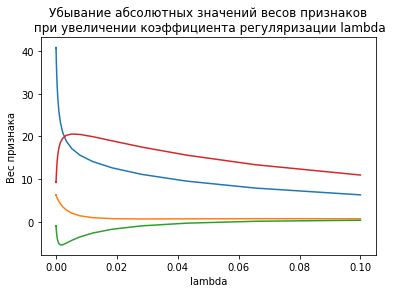

In [81]:
plt.plot(lambda_list, w_list)

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации lambda')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

При малых лямбда получаем большие веса, при увеличении они стремятся к нулю. При наличии большего датасета можно бы было говорить об оптимальных параметрах, на наших же данных MSE в значительных пределах случайна, и меняется около 25 при лямбда меньше 0.0001. 

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [15]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-2, reg=1e-4, print_values=True):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
#         dReg = reg * W/np.abs(W) # градиент регуляризации
        dReg = reg * np.sign(W)
        
        W -= eta * dQ + dReg
      
        if i % (iterations / 10) == 0 and print_values:
            print(f'Iter: {i}, weights: {W}, Reg: {reg} error {err}')
    
    print(f'lambda: {reg} Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [16]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 3.61087836 -0.20117557  0.48774496  1.23593877], Reg: 0.0001 error 3248.2952357420463
Iter: 500, weights: [24.58765787  5.20574145 -6.48044723 18.44773215], Reg: 0.0001 error 37.88726061887
Iter: 1000, weights: [29.06752044  6.08408836 -5.52819949 15.91404742], Reg: 0.0001 error 32.086047683232444
Iter: 1500, weights: [32.29610523  6.19652851 -4.3152146  14.07106813], Reg: 0.0001 error 28.99847853527939
Iter: 2000, weights: [34.71825363  6.22366948 -3.34732099 12.68656206], Reg: 0.0001 error 27.240334924911735
Iter: 2500, weights: [36.54587634  6.23810802 -2.61088883 11.64169131], Reg: 0.0001 error 26.237458654970577
Iter: 3000, weights: [37.92600833  6.2483772  -2.05412941 10.85263492], Reg: 0.0001 error 25.665317644432882
Iter: 3500, weights: [38.9683332   6.25606635 -1.63357757 10.25670925], Reg: 0.0001 error 25.338886546001454
Iter: 4000, weights: [39.75554625  6.26186657 -1.31594986  9.80663776], Reg: 0.0001 error 25.1526279209309
Iter: 4500, weights: [40.35008

In [17]:
# Создадим массив лямбда

n = 50
lambda_list = np.logspace(-4, -1, n)

# Пройдемся циклом вызывая gradient_descent_reg_l2 с разными lambda, сохраним веса в список

w_list = []

for i, val in enumerate(lambda_list):
    W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=val, print_values=False)
    w_list.append(W) 

lambda: 0.0001 Final MSE: 25.009320764760883
lambda: 0.00011513953993264469 Final MSE: 24.994210990838873
lambda: 0.00013257113655901095 Final MSE: 24.989988890712414
lambda: 0.00015264179671752333 Final MSE: 24.99434770119186
lambda: 0.00017575106248547912 Final MSE: 25.00714322262859
lambda: 0.00020235896477251576 Final MSE: 25.001234837185528
lambda: 0.00023299518105153718 Final MSE: 25.00775831835099
lambda: 0.00026826957952797245 Final MSE: 25.005093272115776
lambda: 0.00030888435964774815 Final MSE: 25.009436880195818
lambda: 0.00035564803062231287 Final MSE: 25.00155423862996
lambda: 0.00040949150623804275 Final MSE: 25.010854319250228
lambda: 0.00047148663634573947 Final MSE: 25.01046767887393
lambda: 0.0005428675439323859 Final MSE: 25.017448061518756
lambda: 0.0006250551925273976 Final MSE: 25.00287751026594
lambda: 0.0007196856730011522 Final MSE: 25.0223036732405
lambda: 0.0008286427728546842 Final MSE: 25.017799693090588
lambda: 0.0009540954763499944 Final MSE: 25.04002325

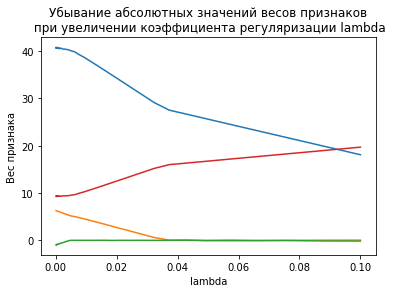

In [18]:
plt.plot(lambda_list, w_list)

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации lambda')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

Получили ломанные графики, причем когда один зануляется, оставшиеся меняют наклон.

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применить-то, конечно, можно (ошибки не выдаст), но смысла в этом столько же, сколько и написать x = 1, и следующей строкой x = 2. Второе действие попросту переопределит первое. В таком порядке как написано в вопросе, получим просто стандартизированные данные.

Но, возможно, такие действия будут иметь смысл, если мы между регуляризацией и стандартизацией производим еще какие-то манипуляции с данными. Например, стандартизируем датасет, находим и удаляем значения с модулем больше какого-то порогового значения (считаем их выбросами), а потом нормализируем. Можно, конечно, это и на "сырых" данных проделать, так что пример такой себе.

4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [35]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [84]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=10000, n_features=5, n_informative=4, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-1.38108668, -1.06601598,  0.04135458,  0.51006682,  1.63784196],
       [ 0.34772734, -0.54760585, -1.14789505,  1.06579866, -0.09737866],
       [ 0.69526476, -0.64624744,  0.58564752,  0.57236281,  1.13361232],
       ...,
       [-0.75184874, -1.11391119, -1.11164767,  0.37462495,  1.13301649],
       [ 0.32963392,  1.0000923 , -0.26239839, -0.12612704, -1.56400306],
       [ 0.08115296, -0.13208564,  2.14037977,  0.25174099,  0.75492407]])

array([-38.86976066,  74.60889109, 128.407604  , ..., -41.494446  ,
       -19.14944612,  74.4562607 ])

array([76.59662737, 79.01470469,  0.        , 93.18614303, 64.21566818])

In [85]:
# Зададим параметры:
# скорость обучения
eta = 0.01

# максимальное число итераций
max_iter = 1000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-3

In [86]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1]) 

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# список произведенных операций
iter_nums = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    new_w = w - eta * (2 / Y.shape[0] * np.dot(X.T, y_pred - Y))
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error.copy())
    iter_nums.append(iter_num)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
errors = np.array(errors)
# iter_nums = np.array(iter_nums)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'Среднеквадратичная ошибка {round(errors[-1], 4)}')

Iteration #0: W_new = [1.5353634  1.58017158 0.02153734 1.83825717 1.24936422], MSE = 23748.19
Iteration #100: W_new = [66.66829823 68.70647899  0.2804826  80.73673438 55.38062606], MSE = 457.22
Iteration #200: W_new = [7.52588749e+01 7.76035415e+01 5.82312279e-02 9.14984812e+01
 6.29634625e+01], MSE = 32.84
Iteration #300: W_new = [ 7.63917391e+01  7.87845603e+01 -6.64816932e-03  9.29662722e+01
  6.40250642e+01], MSE = 25.08
Iteration #400: W_new = [ 7.65411060e+01  7.89415728e+01 -2.01379861e-02  9.31664528e+01
  6.41736123e+01], MSE = 24.94
Iter 404: error - 24.94005692060747, weights: [ 7.65424437e+01  7.89429881e+01 -2.02897701e-02  9.31682869e+01
  6.41749966e+01]
Среднеквадратичная ошибка 24.9401
CPU times: user 1.58 s, sys: 5.48 ms, total: 1.58 s
Wall time: 793 ms


In [87]:
%%time
# Стахостический градиентный спуск

# инициализируем начальный вектор весов
w_s = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_s = [w_s.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# список произведенных операций
iter_nums_s = []

# зададим начальную разницу весов большим числом
weight_dist_s = np.inf

# счетчик итераций
iter_num_s = 0

np.random.seed(1)

# ход градиентного спуска
while weight_dist_s > min_weight_dist and iter_num_s < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred_s = np.dot(X[train_ind], w_s)
    new_w_s = w_s - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred_s - Y[train_ind])

    weight_dist_s = np.linalg.norm(new_w_s - w_s, ord=2)

    error_s = mserror(X, new_w_s, Y)
    
    w_list_s.append(new_w_s.copy())
    errors_s.append(error_s.copy())
    iter_nums_s.append(iter_num_s)
    
    if iter_num_s % 100 == 0:
        print(f'Iteration #{iter_num_s}: W_new = {new_w_s}, MSE = {round(error_s, 2)}')

    iter_num_s += 1
    w_s = new_w_s
    
w_list_s = np.array(w_list_s)
errors_s = np.array(errors_s)
iter_nums_s = np.array(iter_nums_s)

print(f'Iter {iter_num_s}: error - {error_s}, weights: {new_w_s}')
print(f'Среднеквадратичная ошибка {round(errors_s[-1], 4)}')

Iteration #0: W_new = [-0.33764952  2.18062248 -4.11662917  0.73216824  4.24105992], MSE = 23809.21
Iteration #100: W_new = [66.47652167 65.10991669 -4.66252772 69.24197217 55.16897285], MSE = 990.24
Iteration #200: W_new = [75.09268404 76.54463689 -0.61767357 90.5236208  62.28029841], MSE = 44.01
Iteration #300: W_new = [76.97756252 78.19368209 -1.03476904 92.86203106 64.50021547], MSE = 26.97
Iteration #400: W_new = [75.45819373 78.49883615 -1.09619071 92.82687016 63.89943775], MSE = 27.76
Iteration #500: W_new = [75.26122446 78.72646717  0.40889072 93.80672065 63.84712608], MSE = 27.42
Iter 505: error - 27.06327280935764, weights: [75.32957503 78.62645367  0.34166281 93.74122959 64.06868081]
Среднеквадратичная ошибка 27.0633
CPU times: user 1.74 s, sys: 17.2 ms, total: 1.76 s
Wall time: 877 ms


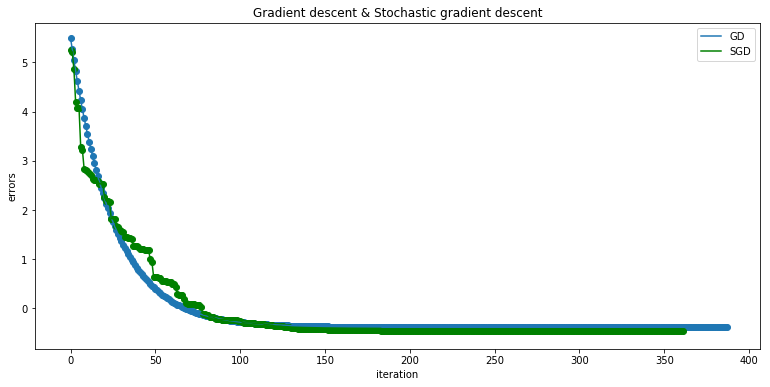

In [88]:
# Визуализируем изменение весов 
plt.figure(figsize=(13, 6))
plt.title('Gradient descent & Stochastic gradient descent')
plt.ylabel(r'errors')
plt.xlabel(r'iteration')
# plt.ylim(-1, 6)
# plt.xlim(-10, 300)

plt.scatter(iter_nums, standart_scale(errors))
plt.plot(iter_nums, standart_scale(errors), label='GD')

plt.scatter(iter_nums_s, standart_scale(errors_s), c='g')
plt.plot(iter_nums_s, standart_scale(errors_s), c='g', label='SGD')

plt.legend()
plt.show()

Потестировав раздичные сгенерированные датасеты и параметры, пришел к выводу, что стохастический градиентный спуск в целом, работает быстрее (меньше вычислений), но в значительной степени зависит от случайностей и в целом более "капризен". Так, на графиках выше, он сошелся быстрее, но по итогу алгоритм имеет большую MSE, а так же видно, что общий наклон кривой у градиентного спуска круче, стохастический же сходится во многом за счет удачных "скачков" весов, вроде того, что в районе 50-й итеррации на графике.
Это не всегда плохо, если функция сложная и имеет несколько миимумов, мы можем получить по разному обученные модели, несколько раз запустив алгоритм. Но для сгенерированного датасета классический градиентный спуск выглядит гораздо надежнее и предсказуемее, и при прочих равных, я бы предпочел использовать его.